In [74]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.figure(figsize=(18, 12))

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

In [76]:
df_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/genres_v2.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [77]:
df_data["time_signature"]

0        4
1        4
2        4
3        3
4        4
        ..
42300    4
42301    4
42302    4
42303    4
42304    4
Name: time_signature, Length: 42305, dtype: int64

In [78]:
df_data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [79]:
df_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [80]:
df_data = df_data[
    [
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "duration_ms",
        "time_signature",
        "genre",
    ]
]

In [81]:
df_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [82]:
df_data["genre"].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [83]:
df_data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

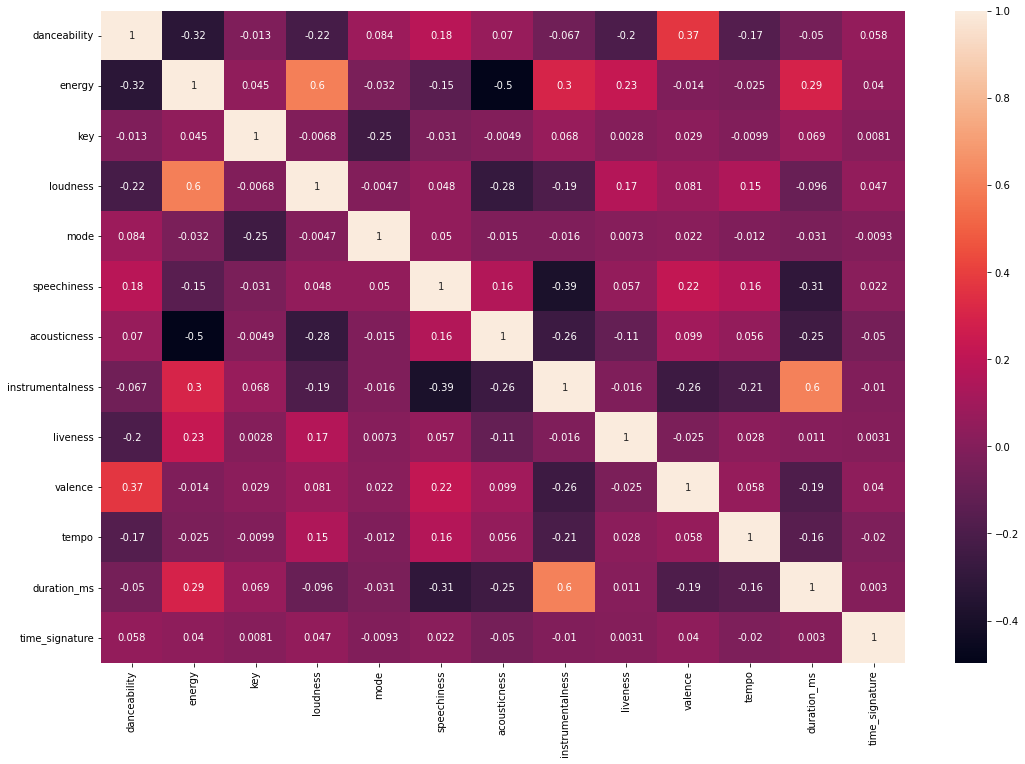

In [84]:
plt.rcParams["figure.figsize"] = [18, 12]
sns.heatmap(df_data.corr(), annot=True)
plt.show()

In [85]:
numerical_columns = df_data.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_columns)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


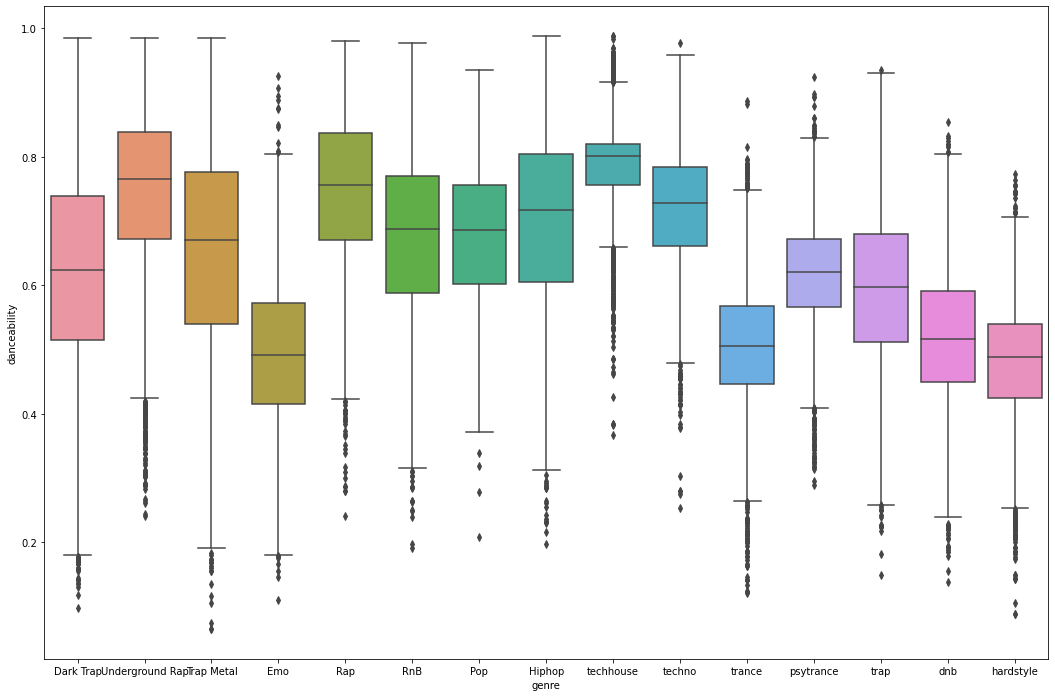

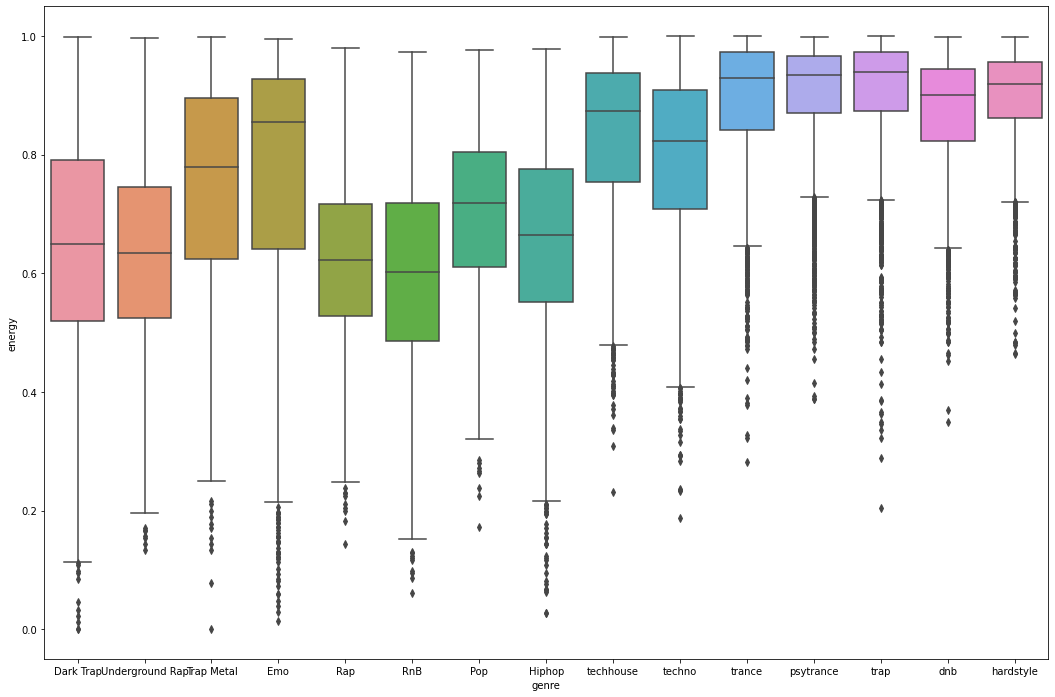

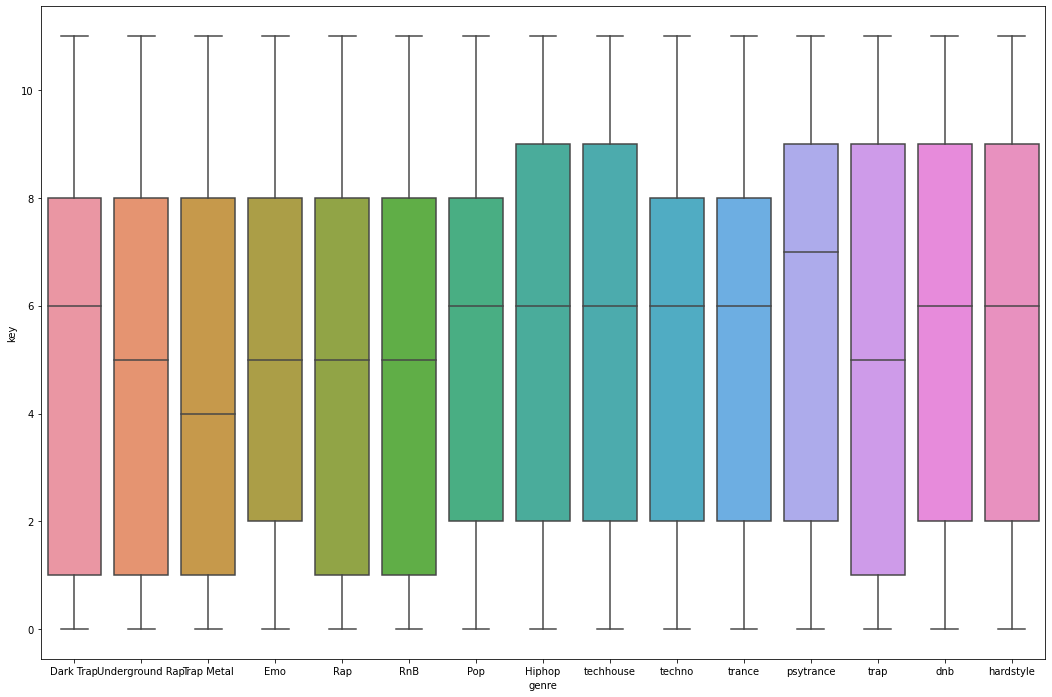

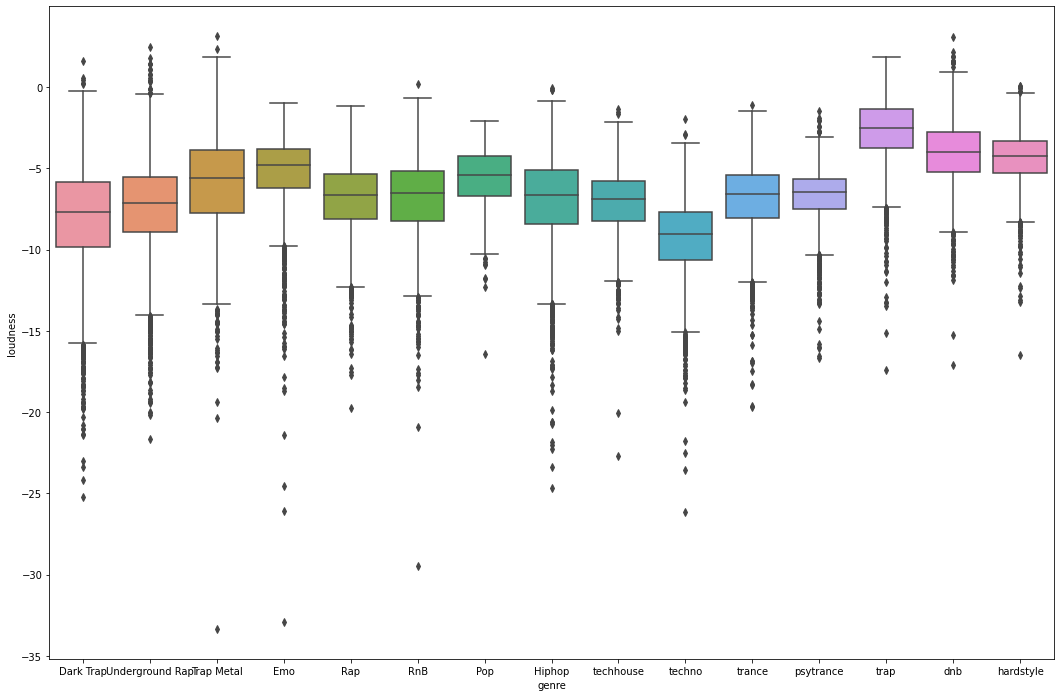

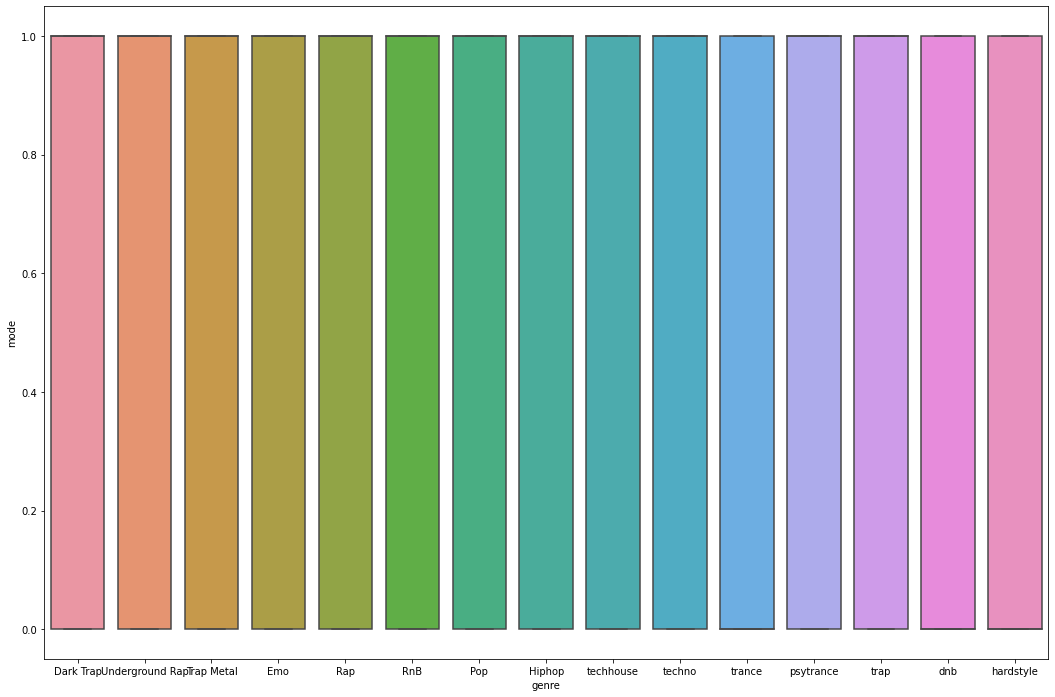

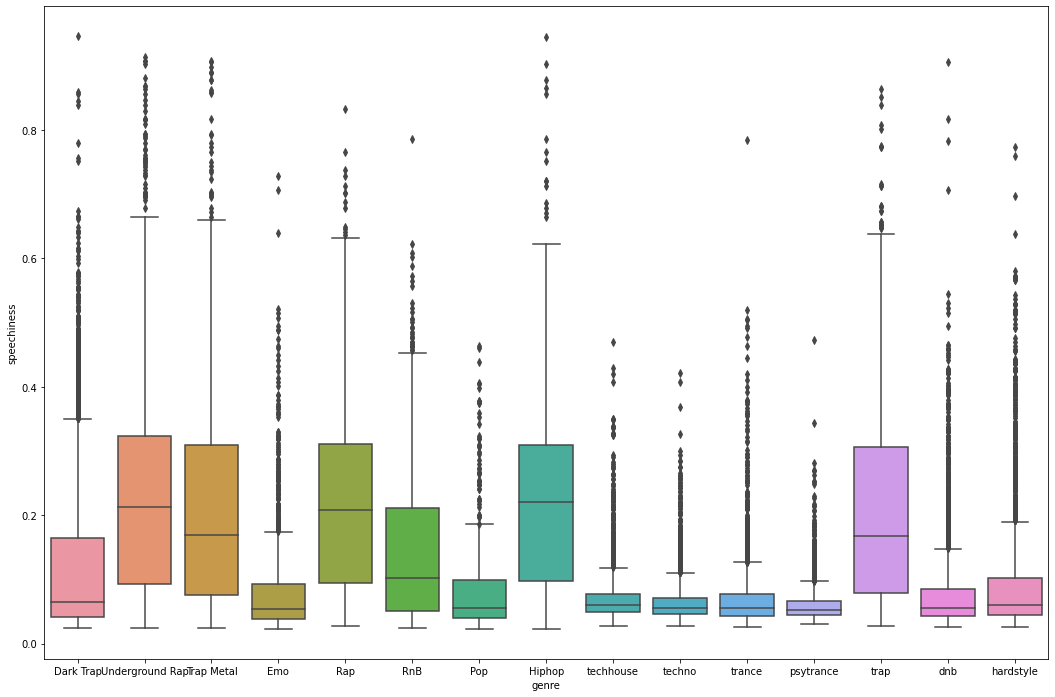

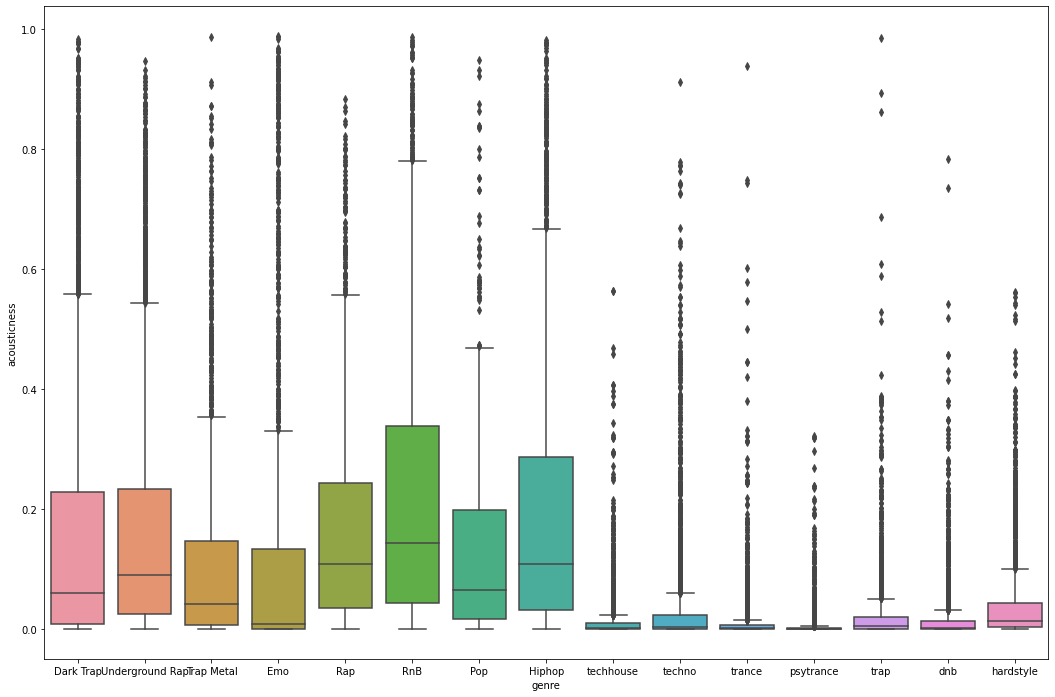

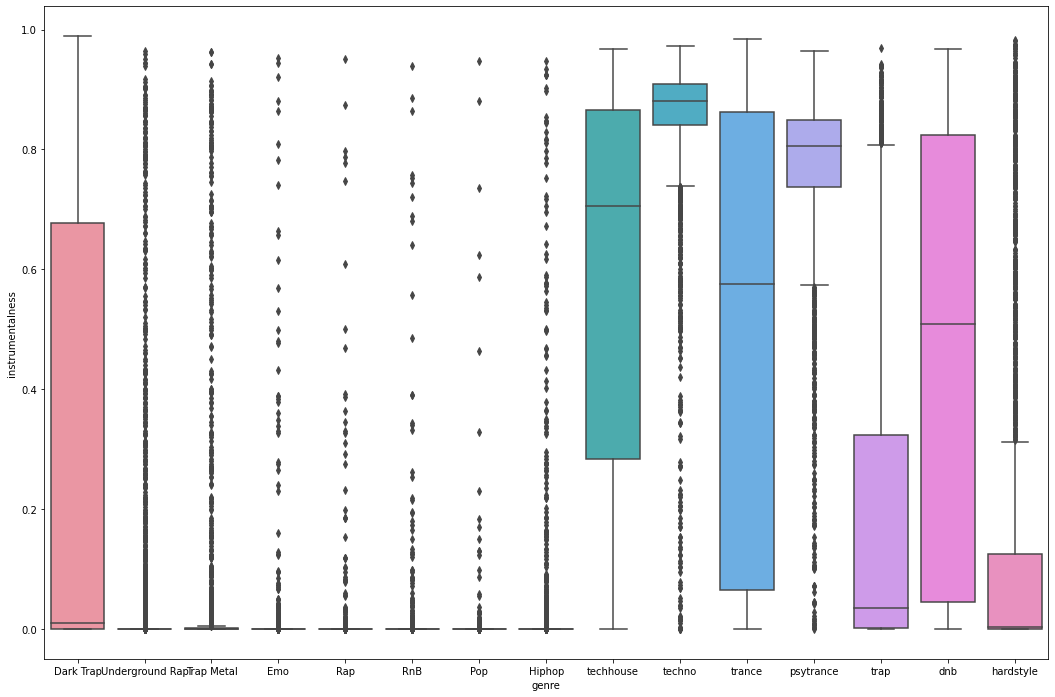

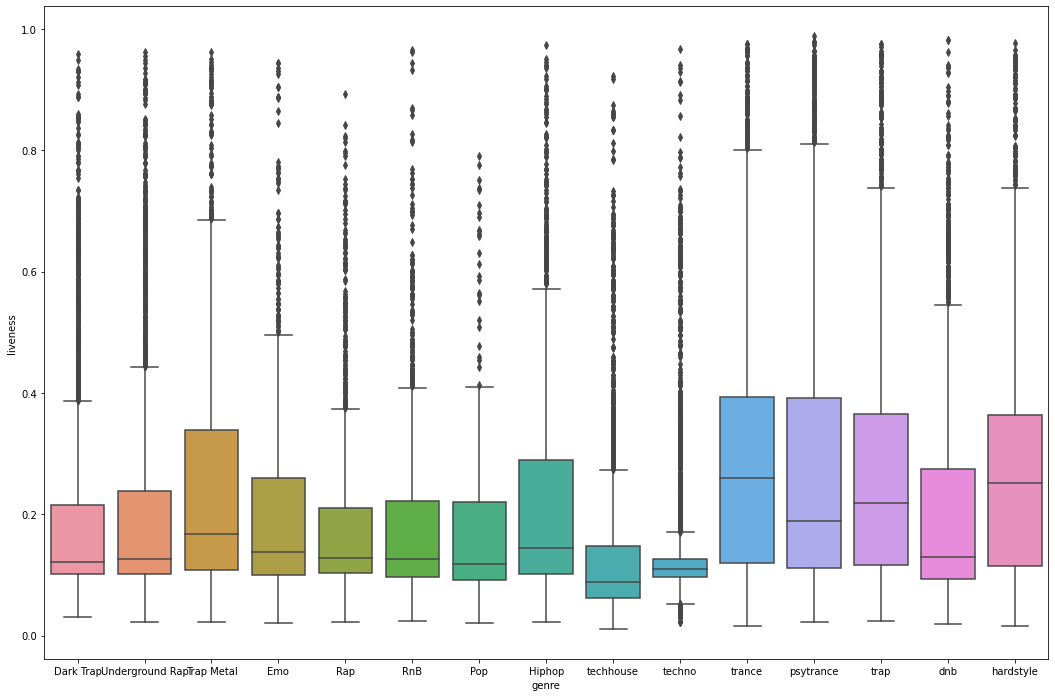

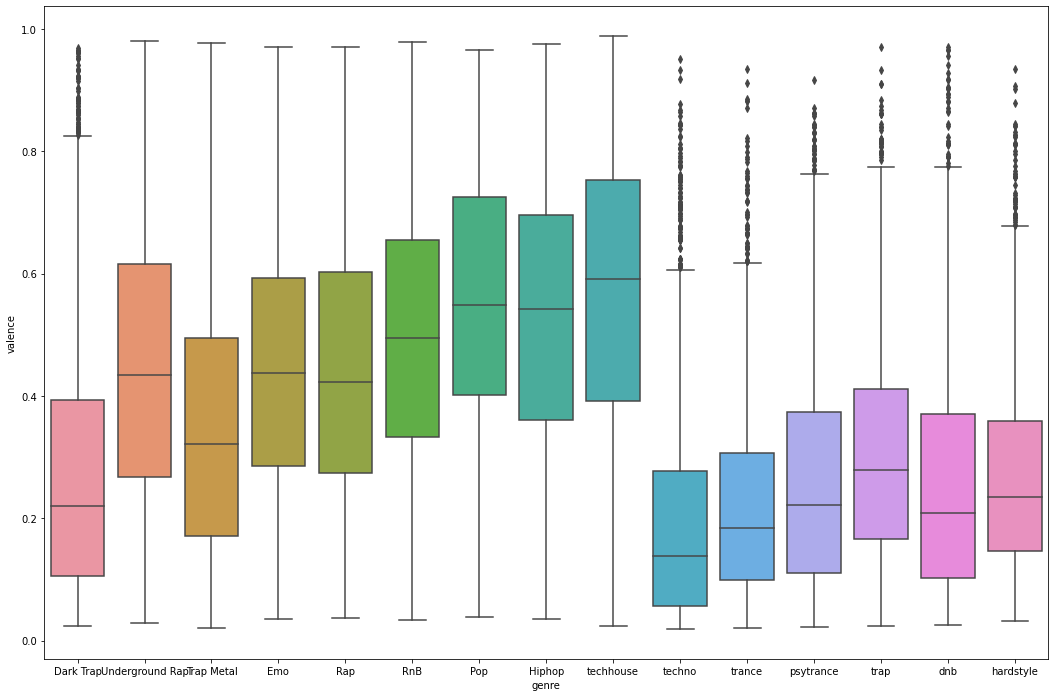

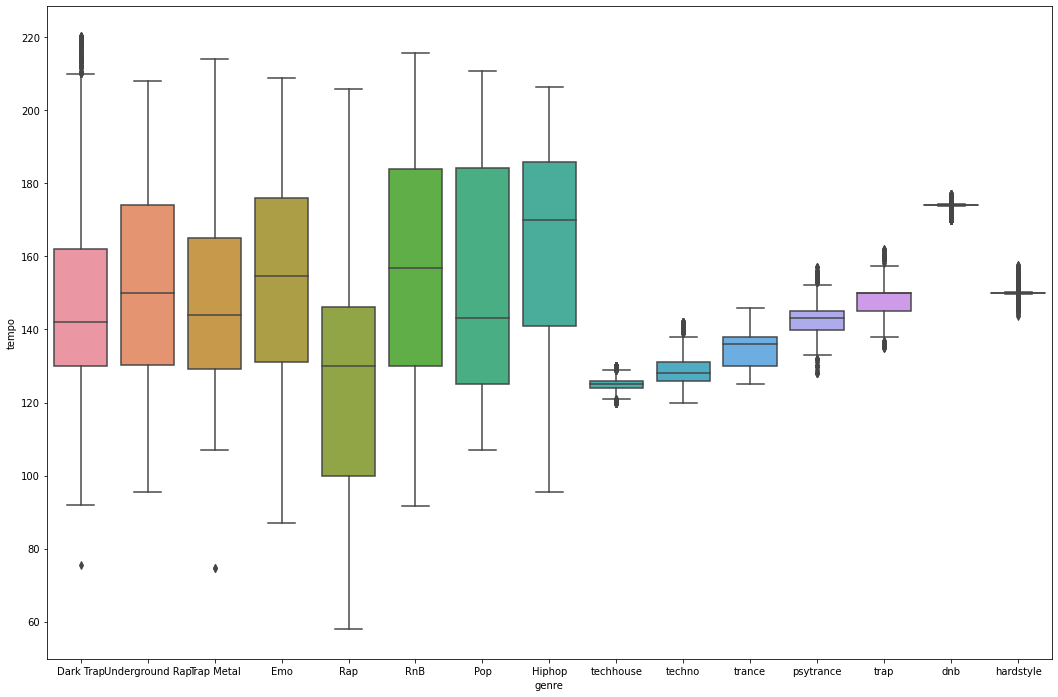

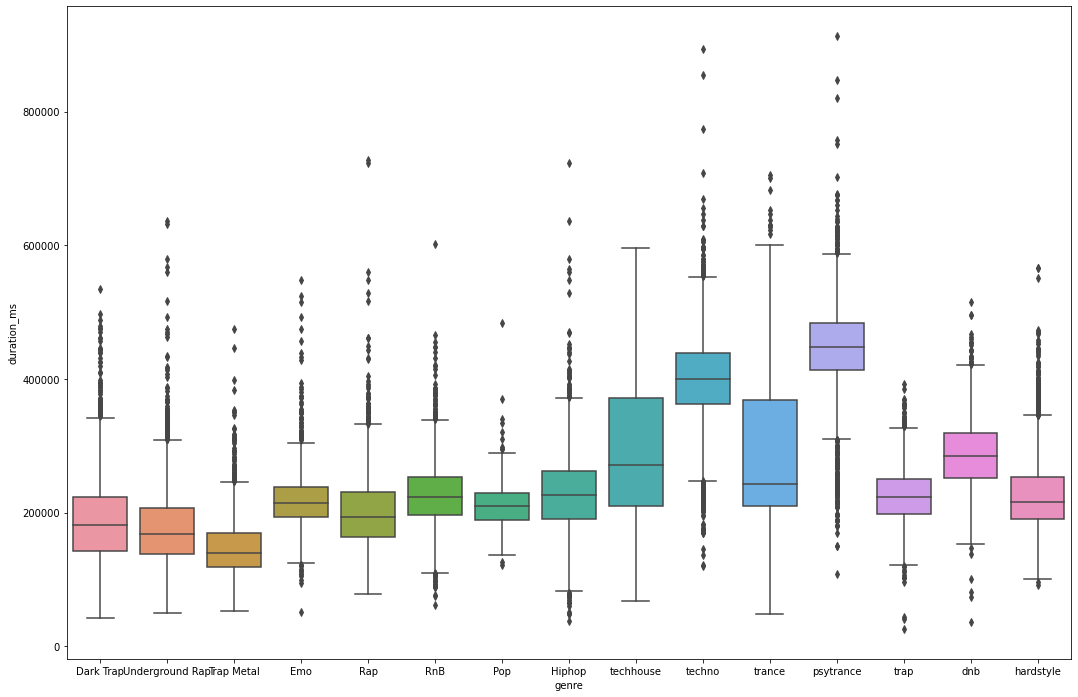

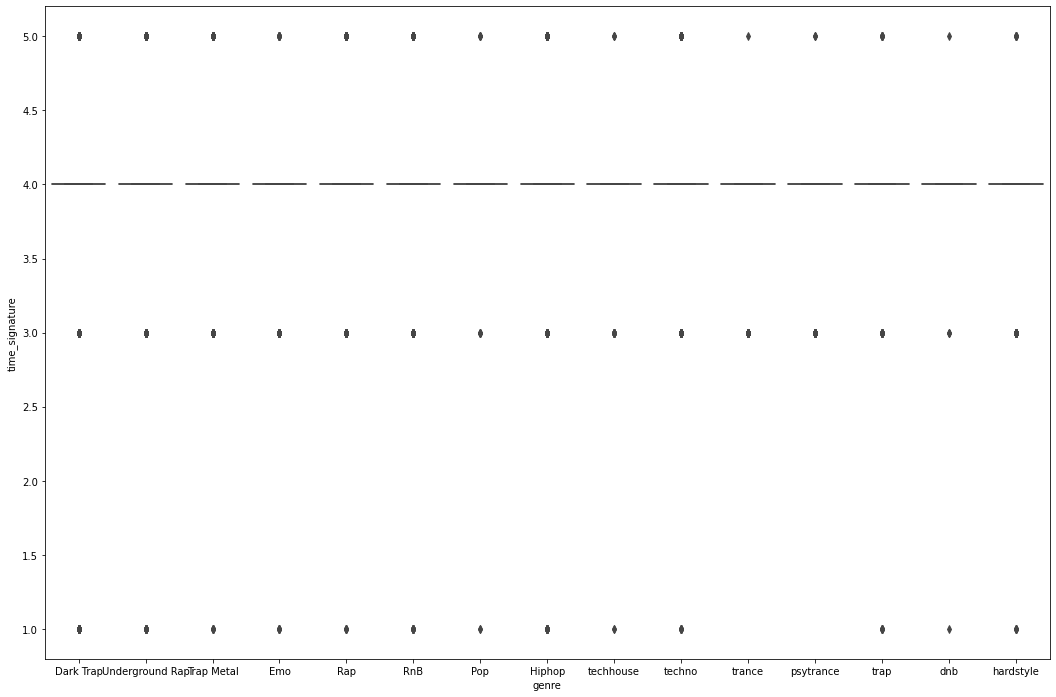

In [86]:
for numerical_column in numerical_columns:
    sns.boxplot(data=df_data, x="genre", y=numerical_column)
    plt.show()

In [87]:
df_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4,hardstyle


In [88]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# convert pandas dataframe to numpy array
x = df_data.drop(columns="genre").values
y = df_data["genre"]

# convert the genre column to numerical labels
y = pd.factorize(y)[0]

# convert numpy array to torch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).long()

# create a TensorDataset
dataset = TensorDataset(x_tensor, y_tensor)

# create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get the number of unique genre labels
num_classes = len(np.unique(y))

# define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=x.shape[1], out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

In [89]:
# create an instance of the neural network
net = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

# train the neural network
for epoch in range(100):
    print(f"Cuttent epoch is {epoch}")
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

Cuttent epoch is 0
Cuttent epoch is 1
Cuttent epoch is 2
Cuttent epoch is 3
Cuttent epoch is 4
Cuttent epoch is 5
Cuttent epoch is 6
Cuttent epoch is 7
Cuttent epoch is 8
Cuttent epoch is 9
Cuttent epoch is 10
Cuttent epoch is 11
Cuttent epoch is 12
Cuttent epoch is 13
Cuttent epoch is 14
Cuttent epoch is 15
Cuttent epoch is 16
Cuttent epoch is 17
Cuttent epoch is 18
Cuttent epoch is 19
Cuttent epoch is 20
Cuttent epoch is 21
Cuttent epoch is 22
Cuttent epoch is 23
Cuttent epoch is 24
Cuttent epoch is 25
Cuttent epoch is 26
Cuttent epoch is 27
Cuttent epoch is 28
Cuttent epoch is 29
Cuttent epoch is 30
Cuttent epoch is 31
Cuttent epoch is 32
Cuttent epoch is 33
Cuttent epoch is 34
Cuttent epoch is 35
Cuttent epoch is 36
Cuttent epoch is 37
Cuttent epoch is 38
Cuttent epoch is 39
Cuttent epoch is 40
Cuttent epoch is 41
Cuttent epoch is 42
Cuttent epoch is 43
Cuttent epoch is 44
Cuttent epoch is 45
Cuttent epoch is 46
Cuttent epoch is 47
Cuttent epoch is 48
Cuttent epoch is 49
Cuttent ep

In [90]:
# extract features from the middle layer
net.eval()
with torch.no_grad():
    x_tensor = net.fc1(x_tensor)
    x_tensor = torch.relu(x_tensor)
    middle_layer_features = net.fc2(x_tensor).numpy()

# perform clustering on the extracted features
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_classes)
kmeans.fit(middle_layer_features)
cluster_labels = kmeans.labels_

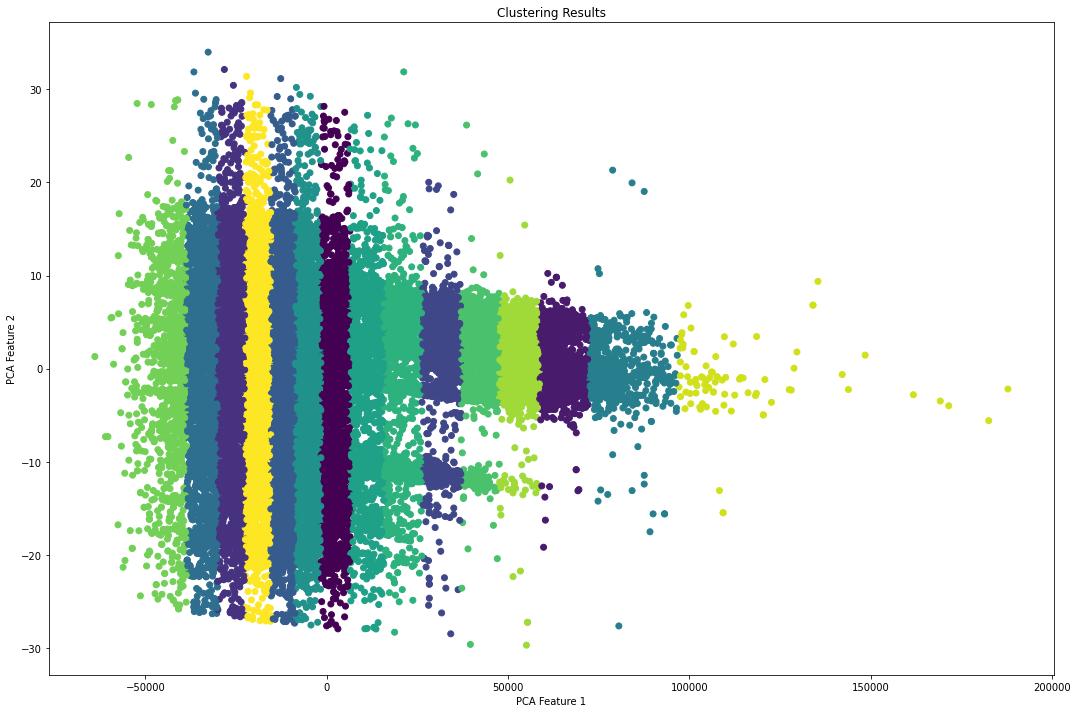

In [91]:
from sklearn.decomposition import PCA

# apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
middle_layer_features_2d = pca.fit_transform(middle_layer_features)

# create a scatter plot of the data, with each point colored according to its cluster assignment
plt.scatter(
    middle_layer_features_2d[:, 0], middle_layer_features_2d[:, 1], c=cluster_labels
)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("Clustering Results")
plt.show()

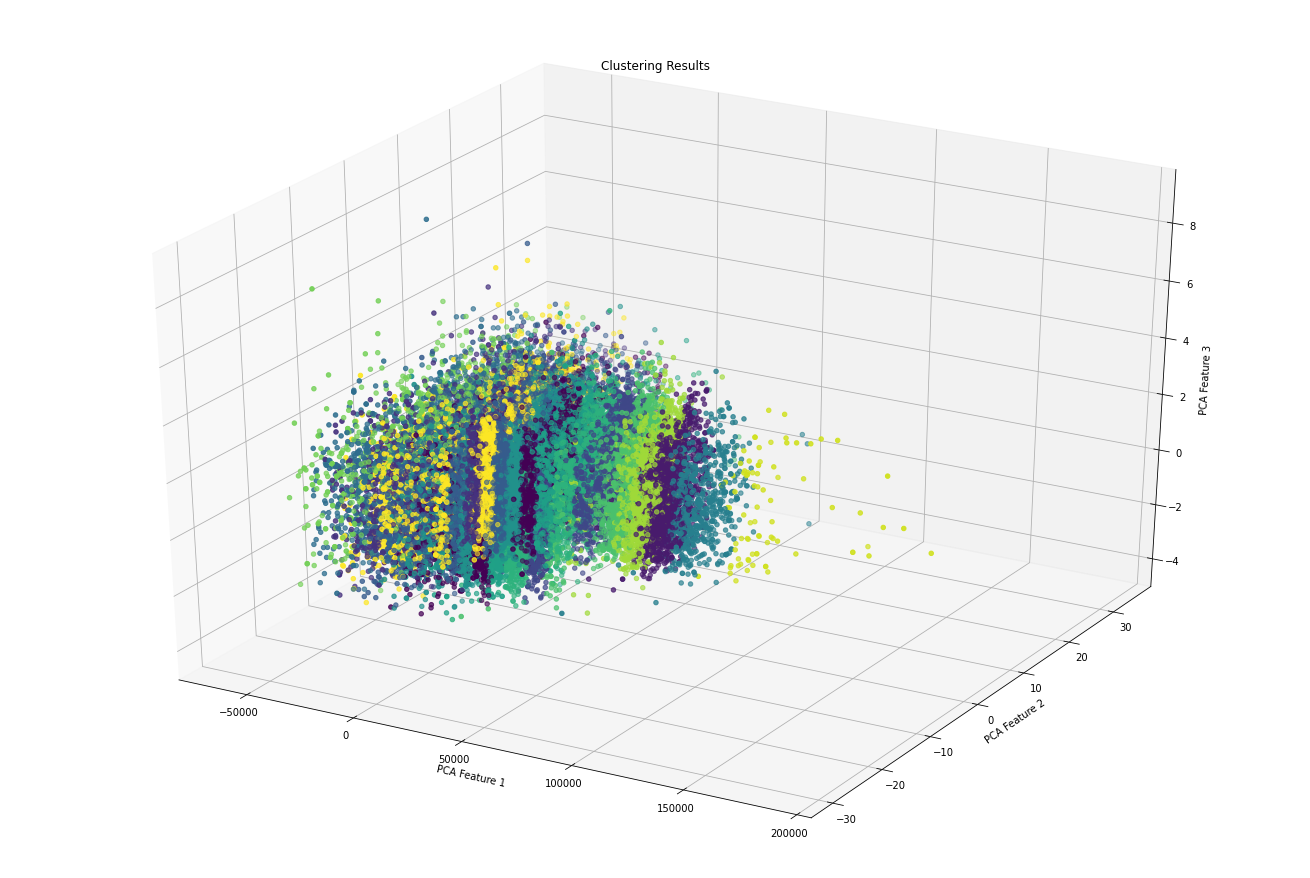

In [92]:
from mpl_toolkits.mplot3d import Axes3D

# apply PCA to reduce the number of features to 3
pca = PCA(n_components=3)
middle_layer_features_3d = pca.fit_transform(middle_layer_features)

# create a 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    middle_layer_features_3d[:, 0],
    middle_layer_features_3d[:, 1],
    middle_layer_features_3d[:, 2],
    c=cluster_labels,
)
ax.set_xlabel("PCA Feature 1")
ax.set_ylabel("PCA Feature 2")
ax.set_zlabel("PCA Feature 3")
plt.title("Clustering Results")
plt.show()